# Assignment 2 - Ei, Manavi, Katie, Omair, and Liz

## 1. Exercises

#### 1. Evaluate the truth of following statement: In the linear regression y = Xβ + u the usual identifying assumption E(u|X) = 0 (call this an assumption of mean independence) implies E(h(X) · u) = 0 for any function h satisfying some regularity conditions related to measurability.

This is true because of the law of iterated expectations.
$$ E(h(X) \cdot u) = E(E(h(X) \cdot u | X)) $$
Since $$ E(u|X) = 0 $$ this becomes
$$ E(E(h(X) \cdot 0 | X)) $$
$$ E(E(0 | X)) = 0 $$

We require that h(X) satisfies regularity conditions, including the first moment exists and is finite.  

#### 2. Suppose y, x and u are scalar random variables, with y and x observed but u unobserved. Consider the function h(x) = $x^3$; under standard assumptions this satisfies our concerns about measurability, so E(u|x) = 0 implies E(u$x^3$) = 0. Use this last condition to motivate a simple least squares estimator of the regression equation y = α + βx + u. How does this differ from the usual OLS estimator? Why might one prefer one to the other, and under what conditions?

First, multiply both sides of the regression equation by $x^3$ to obtain
$$ y \cdot x^3= α\cdot x^3 + βx\cdot x^3 + u\cdot x^3 $$
When $E(u|x)=0$, then $E(ux^3)=0$. So,
$$ \Rightarrow E(y \cdot x^3)= E(α\cdot x^3) + E(βx\cdot x^3) + E(u\cdot x^3) = α\cdot E(x^3) + β\cdot E(x^4) $$

$$ \Rightarrow β = E(x^4)^+[E(y \cdot x^3)-α\cdot E(x^3)] $$

The usual OLS estimator would be β = $ E(x'x)^+[E(x'y)-α] $

We would prefer the OLS estimator since it requires less information (does not need the third and fourth moments of x).


#### 3. Sometimes we will encounter estimators (e.g., Maximum likelihood) that adopt an assumption of independence, rather than mean independence. In the current setting this might be expressed as something like $Pr(x < x ∩ u < u) = F(x)G(u)$ for some cumulative distribution functions F and G. Show that independence implies mean independence, but not the converse.

$$ E[Pr(x < x \cap u < u)] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} Pr(x < x \cap u < u) \cdot f(x, u) \, du \, dx $$

Given x and u are independent, we know: 
$$ Pr(x < x ∩ u < u) = F(x)G(u) $$

Hence, the joint pdf of x and u can be written as product of their individual pdfs. The expression then simplifies to the product of E[x] and E[u]:
$$ E[F(x)G(u)] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(x)f_x(x) dx \cdot G(u)g_u(u) \, du = E[x] \cdot E[u] $$

Therefore:
$$ E[x|u] = E[x] $$

Hence, we show that independence implies mean independence.

Mean independence does not imply independence. Counterexample: consider a binary random variable X and random variable U. When x = 0, the value of u is always equal to 0. When x = 1, u is distributed normally with mean 0 and some non-zero variance sigma. The conditional expectation of U given X is equal to the unconditional  expectation of U, which is 0 (mean independence is satisfied). However, these random variables are not independent. If we observe a non-zero value u, then we know the associated x must be equal to 1. Independence between u and x implies that the cdf of u given x is the same for each value of x.

#### 4. Related to the previous: Show that while u mean independent of x implies E(uh(x)) = E(u) = 0, independence also implies E(g(u)x) = ExEg(u).

We write the expectation as: 
$$ E[g(u)x] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} g(u)x \cdot f(x, u) \, du \, dx $$

Given x and u are independent, we can write: 
$$ E[g(u)x] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} g(u)x \cdot f(x)f(u) \, du \, dx $$

$$ =  \int_{-\infty}^{\infty}  x f(x) \, dx \int_{-\infty}^{\infty} g(u) f(u) \, du $$

Therefore:
$$ E[g(u)x] = E[x]E[g(u)] $$


#### 5. Suppose that y = f(X)+u for some unknown but continuous  function f. Suppose we want to use observed data on X to predict outcomes y, and seek a predictor yhat(X) which is best in the sense that the expected mean squared prediction error E[(y - yhat(X))^2|X] is minimized. What can we say about yhat and its relation to the conditional expectation E[y|X]? Its relation to u?

The best predictor $ \hat{y}(X) $ in the given situation, is the conditional expectation $ E[y|X] $ when we minimize the mean squared error. 

Therefore $ \hat{y}(X) = E[f(X,β)+u|X] = E[f(X,β)|X] + E[u|X] = E[f(X,β)|X] $ assuming u is orthogonal to X.

$ u = y - \hat{y}(X) = y - E[y|X] = E[E[y|X]] - E[y|X] = E[\hat{y}(X)] - \hat{y}(X) $


#### 6. Let y = Xβ + u, and let D be a binary random variable with  E(u|D) = 0 and E(X|D)!= E(X). Establish that D is a valid  instrument, and work out a particularly simple expression of the IV estimator in this case. Discuss.

D is a valid instrument since it satisfies the two main assumptions for a valid IV:

1. The exclusion restriction or exogeneity : E(u|D) = 0
2. The relevance condition: it is correlated with X since E(X|D)!= E(X) (The conditional expected mean of X is not equal to the unconditional expected mean, implying that X and D are not independent).

The IV estimator with instrument Z is : <br>

${\beta}_{IV}$ = E[Z<sup>T</sup>X]<sup>+</sup> E[Z<sup>T</sup>y]<br>

When D is a binary variable, the exogeneity condition is:
\begin{align*}
E[u|D] &= E[u|D=1]P(D=1) + E[u|D=0]P(D=0) = 0 \\[5pt]
&\Rightarrow E[y-X\beta|D=1]P(D=1) + E[y-X\beta|D=0]P(D=0) = 0 \\[5pt]
&\Rightarrow E[(y-X\beta).(D=1)]P(D=1) + E[(y-X\beta).(D=0)]P(D=0) = 0 \\[5pt]
&\Rightarrow E[(y-X\beta).D=1]P(D=1) = 0 \text{ since the second term is } E[0] = 0 \\[5pt]
&\Rightarrow E[y.(D=1)]P(D=1) - \beta E[X.(D=1)]P(D=1) = 0 \\[5pt]
&\Rightarrow {\beta}_{IV} = \frac{E[y]P(D=1)}{E[X]P(D=1)}\\[5pt]
&\Rightarrow {\beta}_{IV} = \frac{E[y]}{E[X]}
\end{align*}

This implies that when the instrument is a binary variable, the IV estimator is a ratio of the expected value of y over the expected value of x. 

#### 7. Write out the two causal diagrams which justify, respectively, the least squares estimator and the IV estimator. What would it mean for one model to be correct, but not the other? How could you test this?

The causal diagram for the least squares estimator depicts that the “dependent” variable y is determined by some random variables X with observations realized, and some random unobserved u. Critically, u and X are orthogonal: <br>i.e., E[u<sup>T</sup>|X]=0 to identify β.

In [42]:
# The causal diagram for the least squares estimator:
from graphviz import Digraph
from IPython.display import Image

# Create a new Digraph
flow_diagram = Digraph()

# Add nodes
flow_diagram.node('X',fontcolor='red')
flow_diagram.node('y',fontcolor='red')
flow_diagram.node('u',fontcolor='red')

flow_diagram.node('title', label='Flow Diagram for OLS estimator', shape='plaintext', fontsize='16', fontweight='bold')

# Add edges
flow_diagram.edge('X', 'y', label='β')
flow_diagram.edge('u', 'y')

# Render the flow diagram and display it
flow_diagram.render('flow_diagram', format='png', cleanup=True)
Image(filename='flow_diagram.png')

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

The causal diagram for the IV estimator depicts that the “dependent” variable y is determined by some random variables X with observations realized, and some random unobserved u. However, u and X are not orthogonal, i.e., E[uT|X]!=0. Therefore, we introduce an instrumental random variable Z, that affects X but is orthogonal to u, i.e., E[uT|Z]=0, to identify β

In [10]:
# The causal diagram for the IV estimator:
from graphviz import Digraph
from IPython.display import Image

# Create a new Digraph
flow_diagram = Digraph()

# Add nodes
flow_diagram.node('X',fontcolor='red')
flow_diagram.node('y',fontcolor='red')
flow_diagram.node('u',fontcolor='red')
flow_diagram.node('Z',fontcolor='red')

flow_diagram.node('title', label='Flow Diagram for IV estimator', shape='plaintext', fontsize='16', fontweight='bold')

# Add edges
flow_diagram.edge('X', 'y', label='β')
flow_diagram.edge('u', 'y')
flow_diagram.edge('u', 'X')
flow_diagram.edge('Z', 'X')

# Render the flow diagram and display it
flow_diagram.render('flow_diagram', format='png', cleanup=True)
Image(filename='flow_diagram.png')

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

We assume that the OLS estimator diagram is correct but the IV estimator diagram may not be. This may be true if Z is not exogenous and is related to y directly as well as indirectly (via X). This implies that the orthogonality condition between u and Z is not equal to 0, E[uT|Z] !=0. 

We can test for this by testing the significance of γ in the following specification: <br>
<br>
y= Xβ + γZ + u

In [11]:
# The causal diagram for the IV estimator if it is incorrect:

from graphviz import Digraph
from IPython.display import Image

# Create a new Digraph
flow_diagram = Digraph()

# Add nodes
with flow_diagram.subgraph() as s:
    s.attr(rank='same')
    s.node('u', label='u', fontcolor='red')
    s.node('Z', label='Z', fontcolor='red')

# Add nodes
flow_diagram.node('X',fontcolor='red')
flow_diagram.node('y',fontcolor='red')
flow_diagram.node('u',fontcolor='red')
flow_diagram.node('Z',fontcolor='red')

flow_diagram.node('title', label='Flow Diagram for incorrect IV estimator', shape='plaintext', fontsize='16', fontweight='bold')

# Add edges
flow_diagram.edge('X', 'y', label='β')
flow_diagram.edge('u', 'y')
flow_diagram.edge('u', 'X')
flow_diagram.edge('Z', 'X')
flow_diagram.edge('Z', 'y', label='γ', color='blue')

# Render the flow diagram and display it
flow_diagram.render('flow_diagram', format='png', cleanup=True)
Image(filename='flow_diagram.png')

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## 2. Wright (1928)

#### 1. Consider the canonical demand and supply model in which quantity supplied is a function of price and a set of “supply shifters”; quantity demanded is a function of price and set of “demand shifters”; and market clearing implies that at some price quantity demanded is equal to quantity supplied.
#### Consider the following questions:
#### (1) **(Control)** What is the expected demand if we ***set*** the price $p = p_0$?

Let 
$$ q_D = D(p, u) $$
$$ q_S = S(p, v) $$
where $u$ and $v$ are exogeneous shocks that affect demand and supply, respectively.

Note that $p$, $q_D$, and $q_S$ are endogeneous.

If we ***set*** the price $p = p_0$,
* The price is no longer random;
* Since $u$ is exogeneous to the model (external factor), setting the price (internal mechanism) does not affect the distribution of $u$.
* Note that $u$ and $v$ are still random since neither is affected by setting the price.

The expected demand if we ***set*** the price $p = p_0$ is:
$$ \mathbb{E}(q_D(p_0)) = \int q_D(p_0, u) dF_u(u) $$

#### (2) **(Condition)** What is the expected demand if we ***observe*** the price $p = p_0$?

If we ***observe*** the price $p = p_0$,
* The observed price is an equilibrium outcome of supply and demand, which are both influenced by $u$ and $v$.
* In other words, the exogeneous shocks $u$ and $v$ influence the price $p$ and the quantity $q$ through demand and supply curves.
* If we observe a higher price (and assuming $q_D$ and $q_S$ are monotonically increasing in $u$ and $v$, respectively,
    * Since a higher demand for any given supply level would increase prices, the exogeneous shock that affects demand, $u$, is likely to be higher.
    * Since a lower supply for any given demand level would increase prices, the exogeneous shock that affects supply, $v$, is likely to be lower.
 
The expected demand if we ***observe*** the price $p = p_0$ is:
$$ \mathbb{E}(q^*|p=p_0) = \mathbb{E}[q^*(u,v)|q_D(p_0,u) =  q_S(p_0, v)] $$

#### (2) **(Counterfactural)** What **would** demand be if we **were** to ***change*** the price to $p_1$, *ceteris paribus*?

Let $(p_0, q_0)$ be initial equilibrium price and quantity outcomes due to $u_0$ and $v_0$ shocks.
Note that $u_0$ and $v_0$ are no longer random here as they are specific values that correspond to the observed equilibrium.

If we **were** to ***change*** (WLOG assume an increase), the price to $p_1$, *ceteris paribus*,
* The quantity demanded will decrease, holding other factors fixed.
* That is, since $u$ and $v$ are no longer random here, we're only moving along the demand curve for a change in price.

The change in demand is:
$$ \triangle = q_D(p_1, u_0) - q_D(p_0,u_0) $$
which is negative for $p_1 > p_0$.

## 3. Plausibly Exogenous

#### The Writing (1934) model we've described takes the form
$$ y = X\beta + u $$
#### with a right-hand-side variable (price) that depends on the disturbance $u$.
#### Were we to estimate the *regression* equation $y=Xb+e$ using least squares, we would obtain $b=X^+y=\beta+X^+u$; we cannot *identify* $b$ with $\beta$ because of unknown and uobservable term $X^+u$.

#### (1) We previously found that with some instrumental variables $Z$ satisfying the moment condition $\mathbb{E}(u^TZ)=0$, it becomes possible to identify $\beta$. Explain in detail how this works, and exactly what assumptions are required.

Usually, we estimate the population parameter $\beta$ using our regression parameter b in the following way:

Population Model:
$$y = X\beta + u$$
$$\beta = X^+y - X^+u$$

When the Conditional Mean Expectation Assumption holds, i.e. when $\mathbb{E}(u|X) = 0$, then $\mathbb{E}(\beta) = b = X^+y$

However, when $\mathbb{E}(u|X) \neq 0$, and strict exogeneity can longer be assumed as in the Wright Model above. We can address this endogeneity, by introducing instrumental variables $Z$ into our model.

Multiplying $Z^T$ to both sides of our population equation we get,
$$ Z^Ty = Z^TX\beta + Z^Tu \implies \beta = \mathbb{E}[Z^TX]^+ \mathbb{E}[Z^Ty] $$

The identifying assumptions required for this to hold true are:
1) The orthogonality assumption: $\mathbb{E}(u^TZ) = 0$ (The instruments do not directly affect y);
2) The relevance assumption: $\mathbb{E}[Z^TX]$ has full column rank to be invertible implying we cannot have more endogeneous variables than instruments and that the instruments and endogenous variables cannot be perfectly collinear.

#### Conley et al. (2012) describe methods for dealing with cases in which the moment condition $E(u^TZ)=0$ is violated, so that in a regression
$$y = X\beta + Z\gamma + u$$
#### estimates of the of the parameter $\gamma$ may be non-zero, but where $\gamma$ is nevertheless "small."
#### (1) Modify the framework we developed for exploring the Wring (1934) model so that the data generating process **linear_dgp** allows for $\gamma \neq 0$, and explore how estimator $b(\gamma)$ varies with $\gamma$.

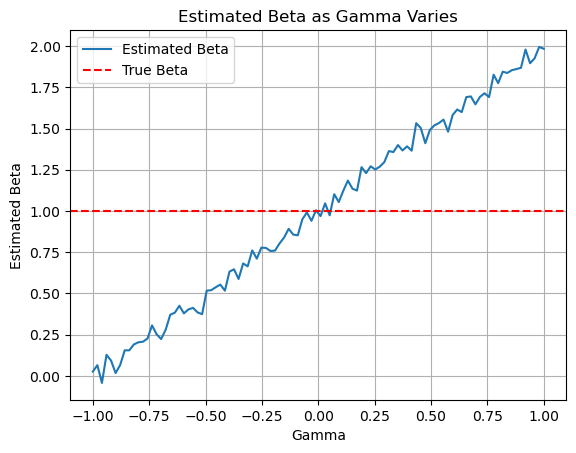

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the parameters for the data generating process
N = 1000  # Sample size
pi = 1.0  # Coefficient for the instrument in the first stage regression
sigma_u = 1.0  # Standard deviation of the error term u
sigma_v = 1.0  # Standard deviation of the error term v
beta_true = 1.0  # True value of the parameter beta
gamma_values = np.linspace(-1, 1, 100)  # Range of gamma values to test

# Initialize arrays to store the results
gamma_results = []
beta_estimates = []

# Data generating process (DGP) function
def linear_dgp(N, pi, sigma_u, sigma_v, beta_true, gamma):
    Z = np.random.normal(0, 1, N)  # Instrument Z
    V = np.random.normal(0, sigma_v, N)  # Error term V
    u = np.random.normal(0, sigma_u, N)  # Error term u
    X = Z * pi + V  # Endogenous regressor X
    y = X * beta_true + Z * gamma + u  # Outcome variable y
    return y, X, Z

# Function to estimate beta using 2SLS
def estimate_beta_2sls(y, X, Z):
    # First stage regression of X on Z
    Z = sm.add_constant(Z)  # Add constant term to Z
    first_stage = sm.OLS(X, Z).fit()
    X_hat = first_stage.predict(Z)  # Predicted X

    # Second stage regression of y on the predicted X
    X_hat = sm.add_constant(X_hat)  # Add constant term to X_hat
    second_stage = sm.OLS(y, X_hat).fit()
    beta_hat = second_stage.params[1]  # Estimated beta
    return beta_hat

# Run the DGP and estimate beta for different gamma values
for gamma in gamma_values:
    # Generate data
    y, X, Z = linear_dgp(N, pi, sigma_u, sigma_v, beta_true, gamma)
    # Estimate beta
    beta_hat = estimate_beta_2sls(y, X, Z)
    # Store results
    gamma_results.append(gamma)
    beta_estimates.append(beta_hat)

# Plot the results
plt.plot(gamma_results, beta_estimates, label='Estimated Beta')
plt.axhline(beta_true, color='red', linestyle='--', label='True Beta')
plt.xlabel('Gamma')
plt.ylabel('Estimated Beta')
plt.title('Estimated Beta as Gamma Varies')
plt.legend()
plt.grid(True)
plt.show()

* We set up the parameters for the simmulation,, such as the sample size (N), true coefficients (pi and beta_true), and the range of values for the deviation from the exclusion restriction (gamma_values).
* Then we defined a function **linear_dgp** that simulates the data according to the model $$ y = X\beta + Z\gamma + u$$ where $X$ is endogeneous and potentailly correlated with the error term $u$, and $Z$ is an instrument. The parameter $\gamma$ quantifies the degree to which the exclusion restriction (that $Z$ shouldn't be correlated with $u$) is violated.
* We created a function **estimate_beta_2SLS** to perform two-stage least squares (2SLS) estimation. In the first stage, we regressed the endogeneous variable $X$ on the instrument $Z$, and in the second stage, we regressed the outcome $y$ on the predicted values of $X$.
* We ran a loop over different values of $\gamma$ to see how estimates of $\beta$ changes as we allow for different degrees of violation of the exclusion restriction.
* The plot shows a clear trend where the estimated value of $\beta$ diverges from the true value as $\gamma$ deviates from 0. Observe that the trend is symmetric about $\gamma = 0$.
* When $\gamma = 0$, the exclusion restriction is perfectly met, i.e. the instrument $Z$ is not correlated with the error term $u$. The 2SLS estimate of $\beta$ should be unbiased (which can be observed in the plot).
* As $\gamma$ moves way from 0, the instrument $Z$ becomes increasingly correlated with the error term $u$, violating the exclusion restriction. This leads to biased estimates of $\beta$, and we can observe taht this bias increases as the absolute value of $\gamma$ increases.
* The further $\gamma$ is from zero, the greater the bias, illustrating the even "small" violations of the exclusion restriction can have substantial impacts on the estimated parameter.
* In summary, ensuring the validity of instruments (i.e. the exclusion restriction) is crucial for obtaining unbiased estimates in IV regressions. When instruments are "plausibly exogeneous" rather than strictly exogeneous, it has significant implications for the validity of the inferences we draw from the model.

#### (2) Calculate a region $A$ over which one might *fail to reject* (i.e., "Accept") the null hypothesis that $b(\gamma) = b(0)$ at a conventional level of significance. Discuss.

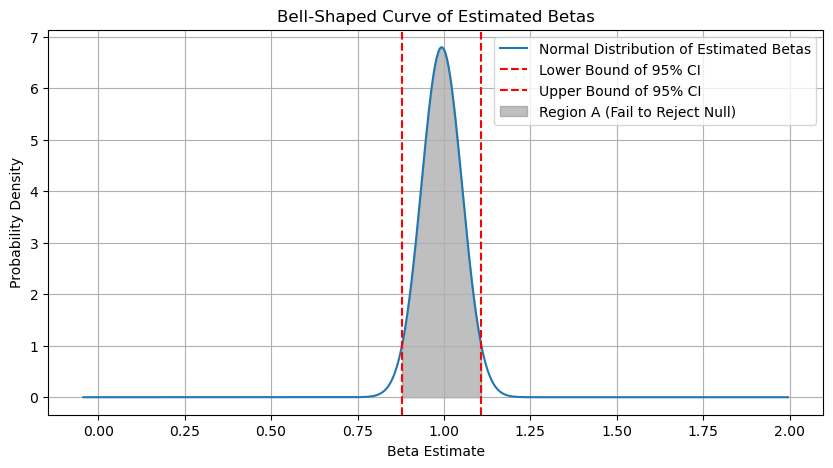

[-0.13131313131313127,
 -0.07070707070707061,
 -0.050505050505050386,
 -0.030303030303030276,
 -0.010101010101010055,
 0.010101010101010166,
 0.030303030303030498,
 0.05050505050505061,
 0.07070707070707072,
 0.09090909090909105]

In [17]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean of the beta estimates
mean_beta_estimate = np.mean(beta_estimates)

# Calculate the standard error of the mean estimate
std_error_mean = np.std(beta_estimates) / np.sqrt(len(beta_estimates))

# Calculate the z-score for the 95% confidence interval
z_score_95 = stats.norm.ppf(1 - 0.05 / 2)

# Calculate the margin of error
margin_of_error = z_score_95 * std_error_mean

# Calculate the confidence interval around the mean estimate
confidence_interval_mean = (mean_beta_estimate - margin_of_error, mean_beta_estimate + margin_of_error)

# Determine the region A where the null hypothesis is not rejected
region_A = [gamma for gamma, beta_hat in zip(gamma_values, beta_estimates) if 
            (beta_hat >= confidence_interval_mean[0]) and (beta_hat <= confidence_interval_mean[1])]

# Generate a range of beta values for plotting the bell curve
beta_range = np.linspace(min(beta_estimates), max(beta_estimates), 1000)
# Calculate the probability density function for the normal distribution
pdf_values = stats.norm.pdf(beta_range, mean_beta_estimate, std_error_mean)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(beta_range, pdf_values, label='Normal Distribution of Estimated Betas')
plt.axvline(confidence_interval_mean[0], color='red', linestyle='--', label='Lower Bound of 95% CI')
plt.axvline(confidence_interval_mean[1], color='red', linestyle='--', label='Upper Bound of 95% CI')
plt.fill_between(beta_range, pdf_values, where=(beta_range >= confidence_interval_mean[0]) & 
                 (beta_range <= confidence_interval_mean[1]), color='gray', alpha=0.5,
                 label='Region A (Fail to Reject Null)')
plt.title('Bell-Shaped Curve of Estimated Betas')
plt.xlabel('Beta Estimate')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Output the region A
region_A

* Region A (Fail to Reject Null) consists of $\gamma$ values within the intervals where the confidence intervals include the true $\beta$ values.
* For this simulation, the values of $\gamma$ in this region A are approximately from -0.13 to 0.15. This means that within this range of $\gamma$, the estimated $\beta$ is not statistically siginificantly different from the true $\beta$ and, therefore we fail to reject the null hypotehsis that $b(\gamma) = b(0)$.
* In other words, this means for estimated $\beta$ values within the grey area, we do not have enough statistical evidence to reject the null hypothesis that our instrument is valid (i.e. $\gamma = 0$). That is, if the estimated $\beta$ falls within this region, we would accept that our instrument is as good as exogeneous at the 95% confidence level.
* This result is in line with the concept of "plausibly exogeneous" instruments, where slight deviations from strict exogeneity are tolerable. 

#### (3) Further modify the framework so that the covariance of $Z$ and $X$ is equal to the parameter $\sigma_{XZ}$. Calculate the set $B$ of pairs ($\gamma$, $\sigma_{XZ}$) such that one would fail to reject the same null hypothesis at the same level of significance. Discuss.

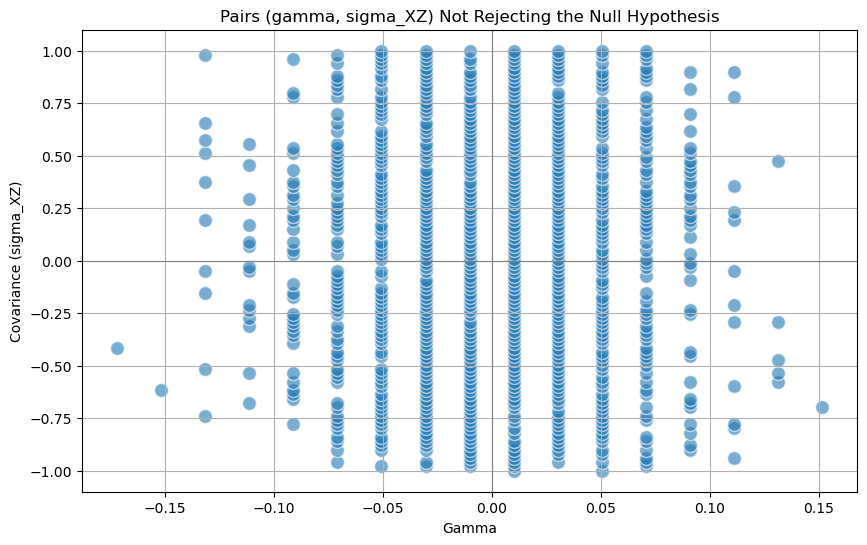

In [18]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# Define the parameters for the simulation
N = 1000  # Number of observations
beta_true = 1.0  # True beta value
pi = 1.0  # Coefficient for the instrument in the first stage regression
sigma_u = 1.0  # Standard deviation of the error term u
sigma_v = 1.0  # Standard deviation of the error term v in the DGP

# Range of gamma and sigma_XZ values to test
gamma_values = np.linspace(-1, 1, 100)
sigma_XZ_values = np.linspace(-1, 1, 100)

# Define the function to estimate beta using 2SLS
def estimate_beta_2sls(y, X, Z):
    Z = sm.add_constant(Z)  # Add a constant term to Z
    first_stage = sm.OLS(X, Z).fit()
    X_hat = first_stage.predict(Z)  # Predicted values of X

    X_hat = sm.add_constant(X_hat)  # Add a constant term to the predicted X
    second_stage = sm.OLS(y, X_hat).fit()
    return second_stage

# Define the data generating process with covariance between Z and X
def linear_dgp_cov(N, pi, sigma_u, sigma_v, sigma_XZ, beta_true, gamma):
    u = np.random.normal(0, sigma_u, N)  # Error term u

    means = np.array([1, 0])
    cov_xz = np.array([[1, sigma_XZ], [sigma_XZ, 1]])

    samples = np.random.multivariate_normal(means, cov_xz, N)

    X = samples[:, 0]
    Z = samples[:, 1]

    y = X * beta_true + Z * gamma + u  # Outcome variable y
    return y, X, Z

# Initialize a list to store the pairs (gamma, sigma_XZ)
set_B = []

# Significance level for the tests
alpha = 0.05

# Calculate the z-score for the confidence level
z_score = stats.norm.ppf(1 - alpha / 2)

# Loop over gamma and sigma_XZ values to run the simulations and estimate beta
for gamma in gamma_values:
    for sigma_XZ in sigma_XZ_values:
        y, X, Z = linear_dgp_cov(N, pi, sigma_u, sigma_v, sigma_XZ, beta_true, gamma)
        second_stage = estimate_beta_2sls(y, X, Z)
        beta_hat = second_stage.params[1]
        beta_se = second_stage.bse[1]

        # Calculate the confidence interval for the beta_hat
        ci_lower = beta_hat - z_score * beta_se
        ci_upper = beta_hat + z_score * beta_se

        # If the true beta value lies within the confidence interval, we do not reject the null hypothesis
        if ci_lower <= beta_true <= ci_upper:
            set_B.append((gamma, sigma_XZ))

# Plotting the results
gammas, sigmas = zip(*set_B)  # Unpacking the pairs into separate lists
plt.figure(figsize=(10, 6))
plt.scatter(gammas, sigmas, alpha=0.6, edgecolors='w', s=100)
plt.axhline(0, color='grey', lw=0.8)
plt.axvline(0, color='grey', lw=0.8)
plt.xlabel('Gamma')
plt.ylabel('Covariance (sigma_XZ)')
plt.title('Pairs (gamma, sigma_XZ) Not Rejecting the Null Hypothesis')
plt.grid(True)
plt.show()

* This simulates a dgp where the endogeneous variable $X$ and the instrumental variable $Z$ have a specified covariance parameter $\sigma_{XZ}$.
* In each simulation run, we calculated the confidence interval for the estimated $\beta$, based on the sample mean and the standard error. If the true $\beta$ value fell within this confidence interval, we considered $\gamma$ and $\sigma_{XZ}$ to be a pair that did not reject the null hypothesis at the 95% confidence level.
* The output set $B$, which contains pairs of ($\gamma$, $\sigma_{XZ}$), represents the combinations of the violation of the exclusion restriction and the covariance between $X$ and $Z$ that are consistent with our instrument still being valid. If a pair ($\gamma$, $\sigma_{XZ}$ is included in set $B$, it means that even with non zero $\gamma$ and $\sigma_{XZ}$, the estimated $\beta$ is not statistically significant from the true $\beta$ value at the given level of significance.
* In other words, the wider the range of $\gamma$ and $\sigma_{XZ}$ pairs in set $B$, the more "plausibly exogeneous" our instrument is. If the set $B$ is very restricted or empty, it suggests that our instrument is sensitive to violations of the exclusion restriction and covariance with the error term, which suggests it might not be a good instrument.
* The plot shows a dense clustering around $\gamma = 0$, which suggests that when the instrument $Z$ is valid, the 2SLS estimator $\beta$ is robust to a wide range of covariance values between $Z$ and $X$.
* The plot also suggests that the points spread along the $\sigma_{XZ}$ axis, implying that the estimator is faily tolerant to various levels of covariance between $Z$ and $X$. This tolerance is particular true when $\gamma$ is close to 0.
* As $\gamma$ moves away from 0, we see fewer points, which indicates that the estimator becomes less robust. The null hypothesis is more likely to be rejected when $\gamma$ is further from 0.
* In summary, the 2SLS estimator is robust in the face of potential endogeneity, as long as the instrument is "plausibly exogeneous" for small deviations of $\gamma$ values from 0. 

## 4. Weak Instruments

(1) Construct a data-generating process dgp which takes as arguments (n, β, π) and returns a triple (y, x, Z) of n observations.

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t
import matplotlib.pyplot as plt 

In [23]:
def dgp(n, beta, pi):
    # Generate Z based on l (length of coefficient vector inputted for pi)
    l = len(pi)
    Z = np.random.randn(n, l)
    
    # Generate v (error term regressing x on Z)
    v = np.random.randn(n)
    
    # Generate x
    x = Z.dot(pi) + v
    
    # Generate u (error term for y)
    u = np.random.randn(n)
    
    # Generate y
    y = beta * x + u
    
    return y, x, Z

(2) Use the dgp function you’ve constructed to explore IV (2SLS) estimates of β as a function of π when l = 1 using a Monte Carlo approach, assuming homoskedastic errors.

In [24]:
# Run dgp function to test
y, x, Z = dgp(1000, 2, np.array([0.75]))

# Print the shapes of generated arrays
print("Shape of y:", y.shape)
print("Shape of x:", x.shape)
print("Shape of Z:", Z.shape)

Shape of y: (1000,)
Shape of x: (1000,)
Shape of Z: (1000, 1)


(a) Write a function two_sls which takes as arguments (y, x, Z) and returns two-stage least squares estimates of β and the standard error of the estimate.

In [25]:
def two_sls(y, x, Z):
    # First stage regression
    first_stage_model = sm.OLS(x, Z).fit()
    # Store fitted values
    x_hat = first_stage_model.predict()

    # Second stage regression
    second_stage_model = sm.OLS(y, sm.add_constant(x_hat)).fit()

    # Pull coefficient estimate of beta hat and standard error
    beta_hat = second_stage_model.params[1]
    se = second_stage_model.bse[1]

    return beta_hat, se

# Set the seed for reproducibility
np.random.seed(1)

# Example usage
beta_hat, se = two_sls(y, x, Z)

# Print estimated coefficient and standard error
print("Estimated coefficient (beta_hat):", beta_hat)
print("Standard error of the estimate (SE):", se)

Estimated coefficient (beta_hat): 1.9324044210935627
Standard error of the estimate (SE): 0.09377156943535744


Note that the standard errors found above are likely to be inaccurate because the estimated endogenous variable(s) in the second stage are based on the first-stage estimates. The predicted values used in the second stage are estimates themselves and are subject to sampling variability. As a result, any imprecision in the first stage will get carried into the second stage.

b) Taking β = π = 1, use repeated draws from dgp to check the bias, and precision of the two_sls estimator, as well as the size and power of a t-test of the hypothesis that β = 0. Discuss. Does a 95% confidence interval (based on your 2SLS estimator) correctly cover 95% of your Monte Carlo draws?

In [26]:
def monte_carlo_simulation(n_simulations, n, beta, pi):
    # Store draws in results list
    results = []
    for i in range(n_simulations):
        # Run simulation
        y, x, Z = dgp(n, beta, pi)
        
        # Pull beta_hat and se for each draw
        beta_hat, se = two_sls(y, x, Z)
        
        # calculate t-stat and p-value
        # null is 0
        t_stat = (beta_hat - 0) / se
        p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-2))
        # significance level is 0.05
        reject_null = 1 if p_value < 0.05 else 0
        accept_null = 1 if p_value > 0.05 else 0
        results.append({'beta_hat': beta_hat, 'se': se, 't-stat': t_stat,
                        'p-value': p_value, 'reject_null': reject_null, 
                        'accept_null': accept_null})
        
    return pd.DataFrame(results)

In [27]:
# Define Parameters
# Re-run dgp function assuming β = π = 1
n_simulations = 1000
n = 1000
beta = 1
pi = np.array([1])

# Set the seed for reproducibility
np.random.seed(1)

# Run Monte Carlo simulation
simulation_results = monte_carlo_simulation(n_simulations, n, beta, pi)

In [28]:
# Calculate bias and precision of 2SLS estimator
# bias: E[beta_hat] - beta 
bias = simulation_results['beta_hat'].mean() - beta
# precision: sqrt [var(beta_hat)/n]
precision = simulation_results['beta_hat'].std()/np.sqrt(len(simulation_results['beta_hat']))

# Calculate size and power of t-test
# power: probability of correctly rejecting a null hypothesis when false
power = simulation_results['reject_null'].mean() # note 100% of tests' null hypotheses are rejected, without rounding
# size: proportion of cases you fail to reject null
size = simulation_results['accept_null'].mean()

# Calculate coverage probability of 95% confidence interval 
# check if true B is included in confidence interval (check if lower bound of CI is below B, and upper bound is above B)
ci_coverage = simulation_results[(simulation_results['beta_hat'] - 1.96 * simulation_results['se'] < beta) &
                                  (simulation_results['beta_hat'] + 1.96 * simulation_results['se'] > beta)].shape[0] / n_simulations

In [29]:
print("Bias of 2SLS estimator:", bias)
print("Precision of 2SLS estimator:", precision)
print("Power of t-test:", power)
print("Size of t-test:", size)
print("Coverage probability of 95% CI:", ci_coverage)

Bias of 2SLS estimator: -0.0013769816865324414
Precision of 2SLS estimator: 0.000989867802182021
Power of t-test: 1.0
Size of t-test: 0.0
Coverage probability of 95% CI: 0.994


Yes, the 95% confidence intervals constructed from the 2SLS estimator cover over 95% of my Monte Carlo draws. 

(c) Taking β = 1, but allowing π ∈ [0, 1] again evaluate the bias and precision of the estimator, and the size and power of a t-test. The Z instrument is “weak” when π is “close” to zero. Comment on how a weak instrument affects two- stage least squares estimators.

In [30]:
# Re-Define Parameters
# Re-run dgp function assuming β = 1 and allowing π ∈ [0, 1]
# For each draw the value of pi is different?
n_simulations = 1000
n = 1000
beta = 1
# Create random value in between 0 and 1 
pi = np.array([np.random.uniform(0, 1)])

# Set the seed for reproducibility
np.random.seed(1)

print("Random value of pi selected between 0 and 1 (as array):", pi)

Random value of pi selected between 0 and 1 (as array): [0.12185229]


In [31]:
# Set the seed for reproducibility
np.random.seed(1)

# Re-Run Monte Carlo simulation with randomly selected value of pi 
simulation_results = monte_carlo_simulation(n_simulations, n, beta, pi)

In [32]:
# Calculate bias and precision of 2SLS estimator
# bias: E[beta_hat] - beta 
bias = simulation_results['beta_hat'].mean() - beta
# precision: sqrt [var(beta_hat)/n]
precision = simulation_results['beta_hat'].std()/np.sqrt(len(simulation_results['beta_hat']))

# Calculate size and power of t-test
# power: probability of correctly rejecting a null hypothesis when false
power = simulation_results['reject_null'].mean() # note 100% of tests are rejected, without rounding
# size: proportion of cases you fail to reject null
size = simulation_results['accept_null'].mean()

# Calculate coverage probability of 95% confidence interval 
# check if true B is included in confidence interval (check if lower bound of CI is below B, and upper bound is above B)
ci_coverage = simulation_results[(simulation_results['beta_hat'] - 1.96 * simulation_results['se'] < beta) &
                                  (simulation_results['beta_hat'] + 1.96 * simulation_results['se'] > beta)].shape[0] / n_simulations

In [33]:
print("Bias of 2SLS estimator:", bias)
print("Precision of 2SLS estimator:", precision)
print("Power of t-test:", power)
print("Size of t-test:", size)
print("Coverage probability of 95% CI:", ci_coverage)

Bias of 2SLS estimator: -0.013327609614108504
Precision of 2SLS estimator: 0.010213950276119644
Power of t-test: 0.763
Size of t-test: 0.237
Coverage probability of 95% CI: 0.994


When pi is "close" to zero, Z is considered a weak instrument, as the instrument has little explanatory power in predicting X. This can lead to biased inference in estimating the causal relationship between x and y through inflated standard errors. With a weak instrument, the power of our t-test decreased notably. The figure below shows the relationship between beta-hat and pi. We see that as pi increases, our estimate for beta hat becomes less noisy.

In [34]:
# Figure showing relationship between beta hat and pi
def monte_carlo_simulation(n_simulations, n, beta, pi_range):
    results = []
    for pi_value in pi_range:
        pi = np.array([pi_value])
        for _ in range(n_simulations):
            y, x, Z = dgp(n, beta, pi)
            beta_hat, se = two_sls(y, x, Z)
            results.append({'pi': pi_value, 'beta_hat': beta_hat})
    return pd.DataFrame(results)

# Parameters
n_simulations = 1000
n = 1000
beta = 1
pi_range = np.random.uniform(0, 1, size=1000)  # Generating 1000 random values for pi

# Run the simulation
simulation_results = monte_carlo_simulation(n_simulations, n, beta, pi_range)

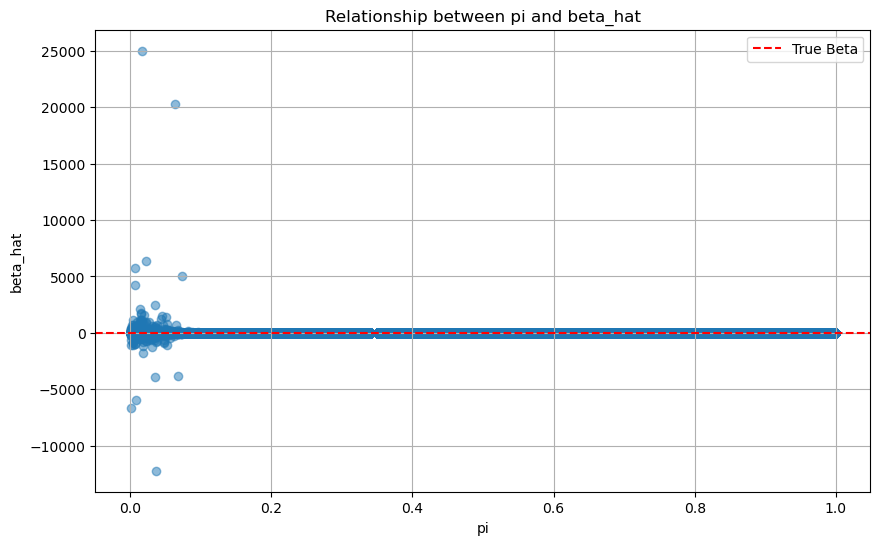

In [35]:
import matplotlib.pyplot as plt 

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(simulation_results['pi'], simulation_results['beta_hat'], alpha=0.5)
plt.axhline(y=beta, color='r', linestyle='--', label='True Beta')
plt.xlabel('pi')
plt.ylabel('beta_hat')
plt.title('Relationship between pi and beta_hat')
plt.legend()
plt.grid(True)
plt.show()

(3) Now consider another “weak” instruments problem. Consider the sequence {1,1/2,1/4,1/8,...}. Let l = 1,2,3,..., and for a particular value of l let the vector of parameters πl consist of the first l elements of the sequence. Thus, your dgp should now return Z we can treat as an n × l matrix, with successive columns of Z increasingly “weak” instruments.

In [36]:
def dgp(n, beta, l):
    # Define the sequence
    sequence = np.array([1 / (2**i) for i in range(1, l + 1)])
    
    # Generate Z based on the input l / sequence denoted above
    Z = np.zeros((n, l))
    
    # Z matrix is n x l matrix
    for i in range(l):
        Z[:, i] = np.random.randn(n) * sequence[i]
    
    # Generate v (error term regressing x on Z)
    v = np.random.randn(n)
    
    # Generate x
    # sum of all IVs and error term for each observation
    x = Z.sum(axis=1) + v
    
    # Generate u (error term for y)
    u = np.random.randn(n)
    
    # Generate y
    y = beta * x + u
    
    return y, x, Z

(a) Taking β = 1, but allow l to increase (l = 1, 2, ...). Note that for l > 1 this is now an “overidentified” estimator. Describe the bias and precision of the estimator, and the size and power of a t-test. Compare with the case of l = 1 and π = 1.

In [37]:
def monte_carlo_simulation(n_simulations, n, beta, l_values):
    results = {'bias': [], 'precision': [], 'power_list': [], 'size_list': []}

    for l in l_values:
        bias_list = []
        precision_list = []
        power_list = []
        size_list = []
        
        for _ in range(n_simulations):
            
            # Run simulation
            y, x, Z = dgp(n, beta, l)
            # First stage regression
            first_stage_model = sm.OLS(x, Z).fit()
            # Store fitted values
            x_hat = first_stage_model.predict()
            # Second stage regression
            second_stage_model = sm.OLS(y, sm.add_constant(x_hat)).fit()
            # Pull coefficient estimate of beta hat and standard error
            beta_hat = second_stage_model.params[1]
            se = second_stage_model.bse[1]
            
            # Calculate p-value
            t_stat = beta_hat / se
            p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-2))
            
            # Calculate reject_null
            reject_null = 1 if p_value < 0.05 else 0
            
            # Calculate accept_null
            accept_null = 1 if p_value > 0.05 else 0
            
            # Calculate bias
            bias = beta_hat - beta
            
            # Calculate precision
            precision = se / np.sqrt(n)
            
            bias_list.append(bias)
            precision_list.append(precision)
            power_list.append(reject_null)
            size_list.append(accept_null)
        
        results['bias'].append(np.mean(bias_list))
        results['precision'].append(np.mean(precision_list))
        results['power_list'].append(np.mean(power_list))
        results['size_list'].append(np.mean(size_list))

    return results

# Set the seed for reproducibility
np.random.seed(1)

# Parameters
n_simulations = 1000
n = 1000
beta = 1
l_values = range(1, 25)  # Varying values of l from 1 to 20

# Run simulation
simulation_results = monte_carlo_simulation(n_simulations, n, beta, l_values)

In [38]:
# Print size_list and power_list along with corresponding L 
for i, l in enumerate(l_values):
    print(f"l = {l}: Size = {simulation_results['size_list'][i]}, Power = {simulation_results['power_list'][i]}")

l = 1: Size = 0.0, Power = 1.0
l = 2: Size = 0.0, Power = 1.0
l = 3: Size = 0.0, Power = 1.0
l = 4: Size = 0.0, Power = 1.0
l = 5: Size = 0.0, Power = 1.0
l = 6: Size = 0.0, Power = 1.0
l = 7: Size = 0.0, Power = 1.0
l = 8: Size = 0.0, Power = 1.0
l = 9: Size = 0.0, Power = 1.0
l = 10: Size = 0.0, Power = 1.0
l = 11: Size = 0.0, Power = 1.0
l = 12: Size = 0.0, Power = 1.0
l = 13: Size = 0.0, Power = 1.0
l = 14: Size = 0.0, Power = 1.0
l = 15: Size = 0.0, Power = 1.0
l = 16: Size = 0.0, Power = 1.0
l = 17: Size = 0.0, Power = 1.0
l = 18: Size = 0.0, Power = 1.0
l = 19: Size = 0.0, Power = 1.0
l = 20: Size = 0.0, Power = 1.0
l = 21: Size = 0.0, Power = 1.0
l = 22: Size = 0.0, Power = 1.0
l = 23: Size = 0.0, Power = 1.0
l = 24: Size = 0.0, Power = 1.0


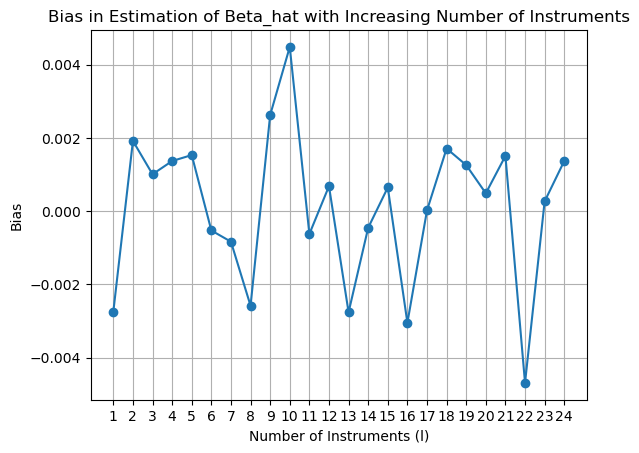

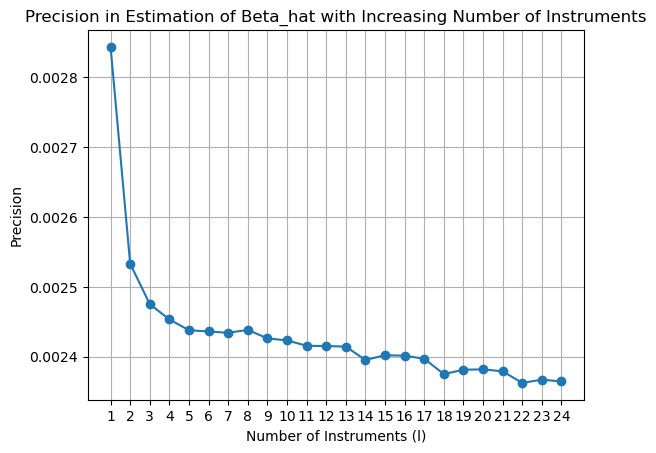

In [39]:
# Plotting bias
plt.plot(l_values, simulation_results['bias'], marker='o')
plt.xticks(l_values)
plt.xlabel('Number of Instruments (l)')
plt.ylabel('Bias')
plt.title('Bias in Estimation of Beta_hat with Increasing Number of Instruments')
plt.grid(True)
plt.show()

# Plotting precision
plt.plot(l_values, simulation_results['precision'], marker='o')
plt.xticks(l_values)
plt.xlabel('Number of Instruments (l)')
plt.ylabel('Precision')
plt.title('Precision in Estimation of Beta_hat with Increasing Number of Instruments')
plt.grid(True)
plt.show()

Increasing the number of instruments in this case does not yield significant improvements in bias reduction, and in fact the bias becomes (as seen in the figure above) quite noisy due to low predictive power of additional instruments. However, we do see precision generally decrease as add weak instruments, especially evident in the drop observed from 1 to 2 instruments. The returns to adding additional instruments appear to be low in this case. 

(b) What can you say about the optimal number of instruments (choice of l) in this case?

In this scenario, we find precision is highest with one instrument. While additional instruments may reduce the bias of β-hat, as seen above, the figure is too noisy to draw  conclusions from. Hence, selecting only one instrument appears to be the most efficient and reliable choice here.